# CoolBox guide: step by step


Firstly import necessary packages, and check your CoolBox version.

In [1]:
% matplotlib inline

# import packages
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import coolbox
from coolbox.api import *

In [2]:
coolbox.__version__

'0.1.6'

## Data preparation
### Download some example files

Firstly we download some example genomic data from public database. Here, all of our data is about the K562 cancer cell line.

In [2]:
%%bash

if [ ! -d data ]; then
    mkdir data

    # example .cool file
    wget -O data/K562_MbolI_5kb.cool ftp://cooler.csail.mit.edu/coolers/hg19/Rao2014-K562-MboI-allreps-filtered.5kb.cool
    # .looplist file
    wget -O data/K562_MbolI_looplist.txt.gz ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE63nnn/GSE63525/suppl/GSE63525_K562_HiCCUPS_looplist.txt.gz

    # bigwig files (ChIP-Seq and RNA-Seq data)
    wget -O data/K562_H3K27ac.bigWig  ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM733nnn/GSM733656/suppl/GSM733656_hg19_wgEncodeBroadHistoneK562H3k27acStdSig.bigWig
    wget -O data/K562_H3K27me3.bigWig ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM733nnn/GSM733658/suppl/GSM733658_hg19_wgEncodeBroadHistoneK562H3k27me3StdSig.bigWig
    wget -O data/K562_H3K4me3.bigWig  ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM945nnn/GSM945297/suppl/GSM945297_hg19_wgEncodeUwHistoneK562H3k04me3StdZnf2c10c5RawRep1.bigWig
    wget -O data/K562_RNASeq.bigWig ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM765nnn/GSM765393/suppl/GSM765393_wgEncodeCshlLongRnaSeqK562NucleolusTotalMinusRawSigRep4.bigWig
    # ChIA-PET data
    wget -O data/K562_chiapet_interaction.txt.gz ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM832nnn/GSM832465/suppl/GSM832465_CHK019M_L2_lane24.ChromatinInteractions.bed.gz
    wget -O data/K562_chiapet.bigWig ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM832nnn/GSM832465/suppl/GSM832465_CHK019M_L2_lane24.bw

    # RefSeq
    wget -O data/refGene.txt.gz http://hgdownload.soe.ucsc.edu/goldenPath/hg19/database/refGene.txt.gz

    # ChromHMM Chromatin states
    wget -O data/K562_chromHMM.bed.gz http://egg.wustl.edu/d/hg19/E123_15_coreMarks_dense.gz
fi

In [3]:
!ls -lh data

total 1.8G
-rw-rw-r-- 1 nanguage nanguage  81M 4月   9  2018 K562_chiapet.bigWig
-rw-rw-r-- 1 nanguage nanguage 2.0M 4月   9  2018 K562_chiapet_interaction.txt.gz
-rw-rw-r-- 1 nanguage nanguage 2.1M 10月 22  2013 K562_chromHMM.bed.gz
-rw-rw-r-- 1 nanguage nanguage 293M 4月   9  2018 K562_H3K27ac.bigWig
-rw-rw-r-- 1 nanguage nanguage 384M 4月   9  2018 K562_H3K27me3.bigWig
-rw-rw-r-- 1 nanguage nanguage  83M 4月   9  2018 K562_H3K4me3.bigWig
lrwxrwxrwx 1 nanguage nanguage   54 10月 26 16:04 K562_MbolI_5kb.cool -> /home/nanguage/DATA2/public/cooler/K562_MbolI_5kb.cool
-rw-rw-r-- 1 nanguage nanguage 363K 4月   9  2018 K562_MbolI_looplist.txt.gz
-rw-rw-r-- 1 nanguage nanguage 926M 4月   9  2018 K562_RNASeq.bigWig
drwxrwxr-x 2 nanguage nanguage 4.0K 10月 27 14:50 preprocessed
-rw-rw-r-- 1 nanguage nanguage 6.5M 4月   8  2018 refGene.txt.gz
-rw-rw-r-- 1 nanguage nanguage 104K 10月 26 16:58 test.bigWig
-rw-rw-r-- 1 nanguage nanguage 230K 10月 26 16:55 test.wig


## Track is the basic element

In CoolBox ploting system, "Track" is the basic element. If you have used genome browser like [UCSC Genome Browser](https://genome.ucsc.edu/) or [WashU EpiGenome Browser](https://epigenomegateway.wustl.edu/), you must know what it is.

Basically, "Track" is a image what is related to a piece of continuous region on the reference genome. The most common track is the bigWig track, If you have read some papers about epigenomics you must have seen some figures like this:

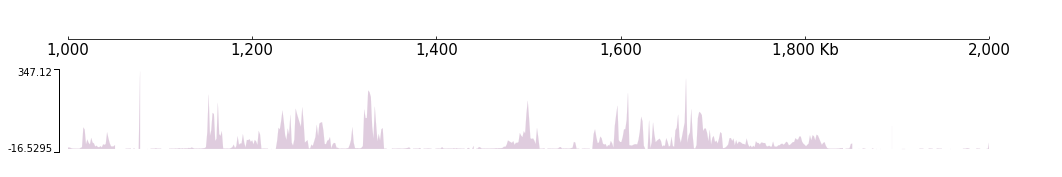

In [4]:
frame = XAxis() + BigWig("data/K562_RNASeq.bigWig")
frame.plot("chr1", 1000000, 2000000)

Actually, bigWig is just one kind of track, there are other kinds of tracks in CoolBox, for display other kind of genomic data like long range genome interaction from ChIA-PET and genome contact matrix from Hi-C.

Now, CoolBox support 12 kinds of tracks:


| Track Type  | CoolBox API | Description |
| :---------: | :---------: | :---------: |
| [XAxis](./Pseudo#XAxis) | `coolbox.api.XAxis` | X axis of genome. |
| [Spacer](./Pseudo#Spacer) | `coolbox.api.Spacer` | For add vertical space between two tracks. |
| [BigWig](./BigWig-and-BedGraph#BigWig) | `coolbox.api.BigWig` | Track of bigWig file. |
| [BedGraph](./BigWig-and-BedGraph#BedGraph) | `coolbox.api.BedGraph` | Track of bedgraph file. |
| Bed | `coolbox.api.Bed` | Track of Bed file, for visualization genome annotation,like refSeq genes chromatin states. |
| [TAD](./Hi\-C#TADs) | `coolbox.api.TAD` | Track for show TAD(topologically associated domains). |
| [Arcs](./Arcs) | `coolbox.api.Arcs` | Show the chromosome interactions get from ChIA-PET or Hi-C data. |
| [Cool](./Hi\-C#Cool) | `coolbox.api.Cool` | Show the chromosome contact matrix from Hi-C data, accept [cooler](https://github.com/mirnylab/cooler)'s `.cool` format. |
| [DotHiC](./Hi\-C#DotHiC) | `coolbox.api.DotHiC` | Show the chromosome contact matrix from Hi-C data, accept [`.hic`](https://github.com/aidenlab/juicer/wiki/Data#hic-files) file format. |
| [HicCompare](./Hi\-C#HicCompare) | `coolbox.api.HicCompare` | Two HiC data on each half triangular matrix, for compare them conveniently. |  
| [Virtual4C](./Hi\-C#Virtual4C) | `coolbox.api.Virtual4C` | Virtual 4C track, using Hi-C data to mimic 4C. |

Supported tracks in newest version of CoolBox please see the [wiki page](https://github.com/GangCaoLab/CoolBox/wiki/Basic-conceptions#track)

### Other kinds of tracks:

#### BED track :
BED track used to show the genome annotation information like RefSeq or chromatin states.
Here we have the RefSeq data, it can be visualized with `coolbox.api.Bed`, but we should do some preprocessing firstly:

In [5]:
# Preprocessing, convert RefGene.txt to BED12 format
import os
from coolbox.utilities import refgene_txt_to_bed12

if not os.path.exists("data/preprocessed"):
    os.mkdir("data/preprocessed")

refgene_txt_to_bed12("data/refGene.txt.gz", "data/preprocessed/refGene.bed")

In [6]:
%%bash

# sort bed file with bedtools
bedtools sort -i data/preprocessed/refGene.bed > data/preprocessed/refGene.sorted.bed

Visualize RefSeq with CoolBox:

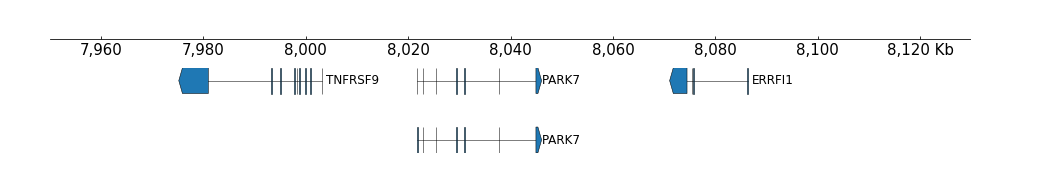

In [7]:
frame = XAxis() + Bed("data/preprocessed/refGene.sorted.bed")

frame.plot("chr1", 7950000, 8130000)

In addition, Bed also has a collasped form, it can be used to show the chromatin states.

In [8]:
# Preprocessing, convert ChromHMM BED(4col) to BED9
from coolbox.utilities import opener, to_string
import seaborn as sns

# Specify color of each states
color_palette = sns.color_palette("Paired", 15)
color_palette = [[str(int(i*255))for i in t] for t in color_palette]

with opener("data/K562_chromHMM.bed.gz") as f_in, open("data/preprocessed/K562_chromHMM.sorted.bed", 'w') as f_out:
    for line in f_in:
        line = to_string(line)
        chrom, start, end, state = line.strip().split()
        color = ",".join(color_palette[int(state)-1])
        out_fields = (chrom, start, end, ".", "0", ".", start, end, color)
        out_line = "\t".join(out_fields) + "\n"
        f_out.write(out_line)

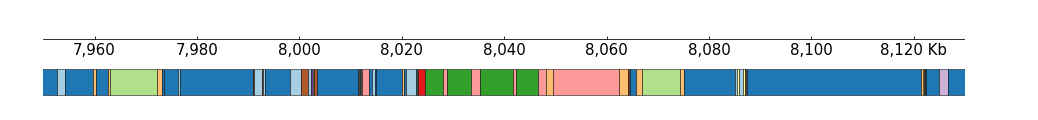

In [9]:
frame = XAxis() + Bed("data/preprocessed/K562_chromHMM.sorted.bed", display="collapsed") + TrackHeight(1)
frame.plot("chr1", 7950000, 8130000)

#### Hi-C (.cool) Track

CoolBox also support Hi-C data visualization.

CoolBox support two types of input format for Hi-C matrix data, 
[.cool](https://github.com/GangCaoLab/CoolBox/wiki/Hi-C#cool) 
and [.hic](https://github.com/GangCaoLab/CoolBox/wiki/Hi-C#dothic) file.

Their API is very similar, here we use .cool file as example.

You can use `CoolBox.api.Cool` to visualize it.

##### `multi-cool` for multiple resolution Hi-C matrix

Cooler file support multi-resolution interaction matrix storage, this feature allow us take appropriate resolution matrix data depending on the corresponding genome region size, it let program respond fast when plot the hic matrix.

The multi-resolution cooler file is suggested, you can use `cooler zoomify` command to create multi-resolution cooler file from a single resolution cooler file:

In [28]:
%%bash

cooler zoomify --balance data/K562_MbolI_5kb.cool

INFO:cooler:Recursively aggregating "data/K562_MbolI_5kb.cool"
INFO:cooler:Writing to "data/K562_MbolI_5kb.mcool"
INFO:cooler:total_length (bp): 3095693983
INFO:cooler:binsize: 5000
INFO:cooler:n_zooms: 12
INFO:cooler:quad tile cover: 4096
INFO:cooler:Copying base matrix to level 12 and producing 12 new zoom levels counting down to 0...
INFO:cooler:Zoom level: 12 bin size: 5000
INFO:cooler:Aggregating at zoom level: 11 bin size: 10000
INFO:cooler:Creating cooler at "data/K562_MbolI_5kb.mcool::/11"
INFO:cooler:Writing chroms
INFO:cooler:Writing bins
INFO:cooler:Writing pixels
INFO:cooler:0 10000000
INFO:cooler:10000000 20000000
INFO:cooler:20000000 30000000
INFO:cooler:30000000 40000000
INFO:cooler:40000000 48006220
INFO:cooler:48006220 58006220
INFO:cooler:58006220 68006220
INFO:cooler:68006220 78006220
INFO:cooler:78006220 85074388
INFO:cooler:85074388 95074388
INFO:cooler:95074388 105074388
INFO:cooler:105074388 114145006
INFO:cooler:114145006 124145006
INFO:cooler:124145006 13414500

Above command produced a matrix balanced `multi-cool` file with `.mcool` extension:

In [31]:
!ls data/*.mcool

data/K562_MbolI_5kb.mcool


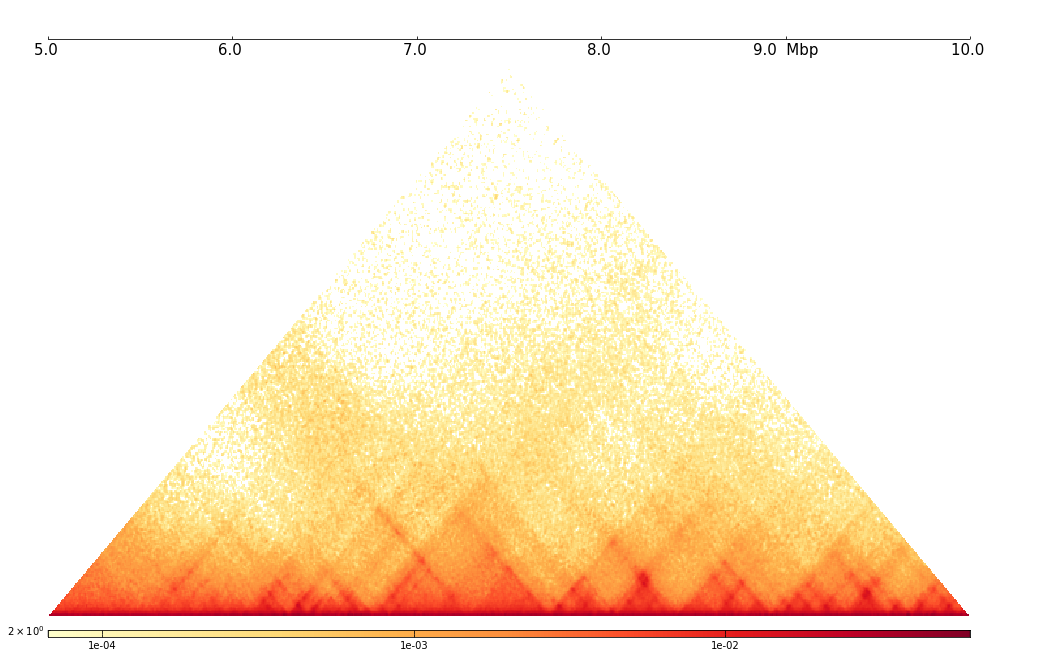

In [33]:
frame = XAxis() + Cool("data/K562_MbolI_5kb.mcool")
frame.plot("chr1", 5_000_000, 10_000_000)

Default Hi-C Track will be plot in `triangular` style, it also can be `matrix` or `window` style.

Just change the specify the `style` parameter, when create Cool instance, like this: 

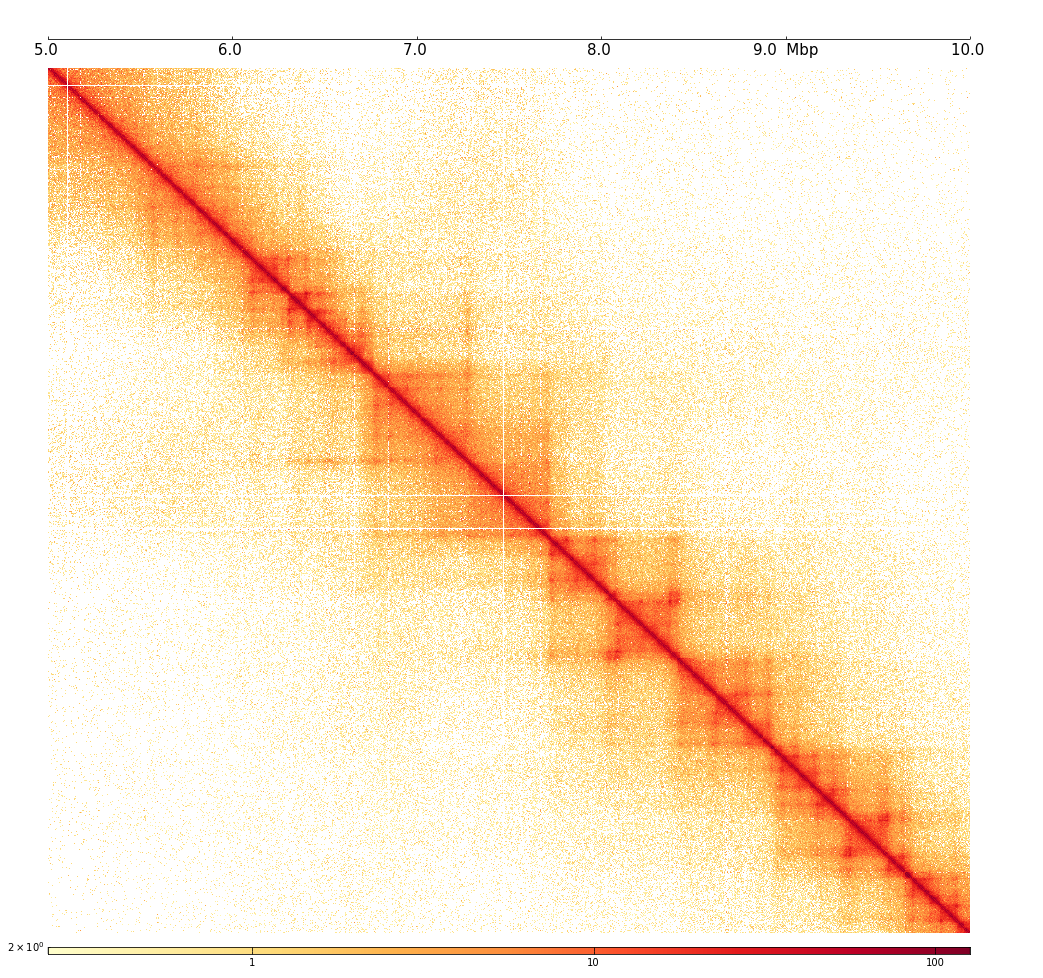

In [34]:
frame = XAxis() + Cool("data/K562_MbolI_5kb.cool", style='matrix')
frame.plot("chr1", 5_000_000, 10_000_000)

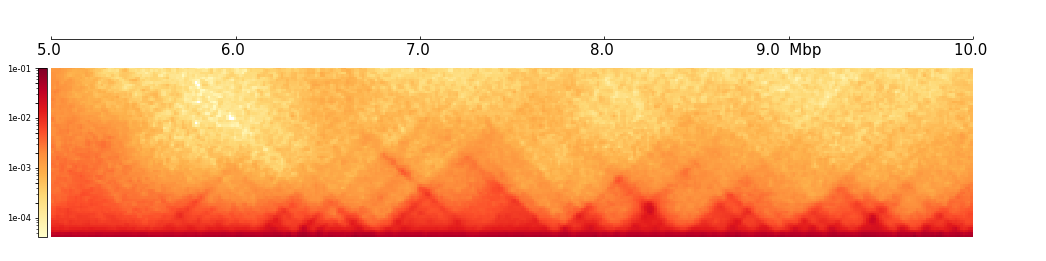

In [36]:
frame = XAxis() + Cool("data/K562_MbolI_5kb.mcool", style='window', depth_ratio=0.4)
frame.plot("chr1", 5_000_000, 10_000_000)

`Cool` show balanced matrix as default, if you want to show the unbalanced matrix, you can set as:

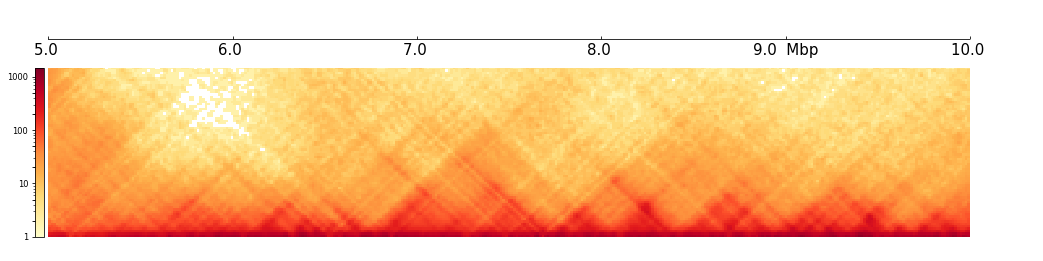

In [40]:
frame = XAxis() + Cool("data/K562_MbolI_5kb.mcool", style='window', depth_ratio=0.4, balance=False) + MinValue(1)
frame.plot("chr1", 5_000_000, 10_000_000)

#### Arcs Track

Another kind of important technology is ChIA-PET, 
it can produce many long-range genome-wide chromatin interactions.

And, some times, Hi-C contact matrix is too informative to understand, 
we only need some most important interactions from it, 
We use some tools like [HICCUPS](https://github.com/theaidenlab/juicer/wiki/HiCCUPS) call the most significant interactions, or "Peaks" from contact matrix.

In either case, Arcs Track can be used to visulize the data.

"data/K562_MbolI_looplist.txt.gz" is the output file of HICCUPS, lets we see the file format:

In [41]:
! zcat data/K562_MbolI_looplist.txt.gz | head -n 5

chr1	x1	x2	chr2	y1	y2	color	o	e_bl	e_donut	e_h	e_v	fdr_bl	fdr_donut	fdr_h	fdr_v	num_collapsed	centroid1	centroid2	radius
10	100180000	100190000	10	100410000	100420000	0,255,255	39	9.95646	11.519	11.7385	14.9019	7.22364827281e-06	7.33188623501e-06	1.23022924318e-05	0.00122917451331	1	100185000	100415000	0
10	101600000	101610000	10	101800000	101810000	0,255,255	93	32.7752	31.5141	40.2431	34.3644	7.06327749359e-10	5.0694154775e-10	1.48400838822e-05	1.16097751024e-09	2	101610000	101805000	5000.0
10	102100000	102105000	10	102190000	102195000	0,255,255	59	12.1641	12.737	13.9739	17.5963	5.85925277185e-16	2.18894623831e-12	3.6876838188e-12	1.24919653976e-08	4	102100000	102195000	3535.53390593
10	102100000	102105000	10	102265000	102270000	0,255,255	40	7.53328	12.6254	15.2808	14.6919	6.64842234799e-11	0.000269183429887	0.000454497748593	0.000516371931775	2	102100000	102270000	3535.53390593

gzip: stdout: Broken pipe


And we alse check the ChIA-PET interaction file:

In [42]:
! zcat data/K562_chiapet_interaction.txt.gz | head -n 5

chr1	2438340	2439860	chr1:2438340..2439860-chr3:73159930..73161594,4	400	.	2438340	2439860	255,0,0	1	1520	0
chr3	73159930	73161594	chr1:2438340..2439860-chr3:73159930..73161594,4	400	.	73159930	73161594	255,0,0	1	1664	0
chr1	2438360	2439860	chr1:2438360..2439860-chr17:41463653..41465693,3	300	.	2438360	2439860	255,0,0	1	1500	0
chr17	41463653	41465693	chr1:2438360..2439860-chr17:41463653..41465693,3	300	.	41463653	41465693	255,0,0	1	2040	0
chr1	2439840	2441340	chr1:2439840..2441340-chr17:41465699..41467820,3	300	.	2439840	2441340	255,0,0	1	1500	0

gzip: stdout: Broken pipe


`CoolBox.api.Arcs` Track accept the files in this `.arcs` format:

| column | name | description | example |
| ------ | ---- | ----------- | ------- |
| 1 | chromosome 1 | chromosome 1 (one side of interaction) | chr1 |
| 2 | start 1 | start position 1 | 100000 |
| 3 | end 1 | end position 1 | 200000 |
| 4 | chromosome 2 | chromosome 2 (another side of interaction) | chr2 |
| 5 | start 2 | start position 2 | 500000 |
| 6 | end 2 | end position 2 | 600000 |
| 7 | score | score of this interaction | 0.75 |

example lines:

```
chr1    2000000    3001000    chr1    4000000    5001000    0.8
chr2    5020000    7020000    chr2    12000000    12010000    0.5
```

We convert looplist and chia-pet interactions to this format firstly:

In [43]:
from coolbox.utilities import opener, to_string

loop_list = "data/K562_MbolI_looplist.txt.gz"
loop_list_arcs = "data/preprocessed/K562_MbolI_looplist.arcs"

# Preprocessing, convert looplist to .arcs
with opener(loop_list) as f_in, open(loop_list_arcs, 'w') as f_out:
    for i, line in enumerate(f_in):
        if i == 0:
            continue # skip first line
        line = to_string(line)
        items = line.split("\t")
        chr1, s1, e1, chr2, s2, e2, *others = items
        score = "1" # we simplify the problem here, set all score to one
        out_items = (chr1, s1, e1, chr2, s2, e2, score)
        out_line = "\t".join(out_items) + "\n"
        f_out.write(out_line)

In [44]:
import re

chiapet_list = "data/K562_chiapet_interaction.txt.gz"
chiapet_arcs = "data/preprocessed/K562_chiapet_interaction.arcs"

# Preprocessing, convert chia-pet interactions to .arcs
with opener(chiapet_list) as f_in, open(chiapet_arcs, 'w') as f_out:
    for i, line in enumerate(f_in):
        line = to_string(line)
        items = line.split("\t")
        interaction = items[3]
        chr1, s1, e1, chr2, s2, e2, _ = re.split(":|\.\.|-|,", interaction)
        if chr1 == chr2:
            score = "1" # we simplify the problem here, set all score to one
            out_items = (chr1, s1, e1, chr2, s2, e2, score)
            out_line = "\t".join(out_items) + "\n"
            f_out.write(out_line)

Then we can visualize them use `coolbox.api.Arcs`:

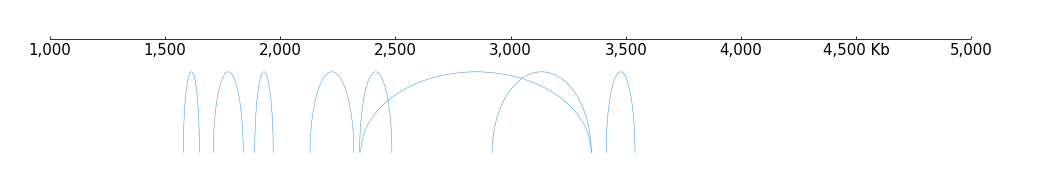

In [45]:
frame = XAxis() + Arcs("data/preprocessed/K562_MbolI_looplist.arcs")
frame.plot("chr1", 1000000, 5000000)

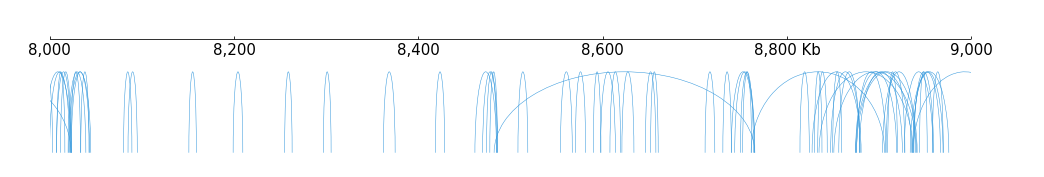

In [46]:
frame = XAxis() + Arcs("data/preprocessed/K562_chiapet_interaction.arcs")
frame.plot("chr1", 8000000, 9000000)

## Compose Tracks to Frame

In CoolBox you can compose tracks with "+" operator, as shown above, compose XAxis track and a bigwig track to a frame object:

```
frame = XAxis() + BigWig("data/K562_RNASeq.bigWig")
```

Frame is a higher level object, denote a set of relevant tracks. We can use a long "+" expression compose a complex Frame.

In [48]:
frame = XAxis() +\
        Cool("data/K562_MbolI_5kb.mcool", style="window", depth_ratio=0.5) +\
        Arcs("data/preprocessed/K562_MbolI_looplist.arcs") + Inverted() +\
        Spacer(1) +\
        Bed("data/preprocessed/K562_chromHMM.sorted.bed", display="collapsed") + TrackHeight(0.6) +\
        Spacer(1) +\
        Bed("data/preprocessed/refGene.sorted.bed") + TrackHeight(10) +\
        Spacer(1) +\
        BigWig("data/K562_chiapet.bigWig") + Color("#ff9c9c") +\
        Arcs("data/preprocessed/K562_chiapet_interaction.arcs") + Inverted() +\
        BigWig("data/K562_H3K27ac.bigWig")  + Color("#fcbe07") + Title("H3K27ac") +\
        BigWig("data/K562_H3K27me3.bigWig") + Color("#fcbe07") + Title("H3K27me3") +\
        BigWig("data/K562_H3K4me3.bigWig")  + Color("#fcbe07") + Title("H3K4me3") +\
        BigWig("data/K562_RNASeq.bigWig") + Color("#287f2f") +\
        XAxis()

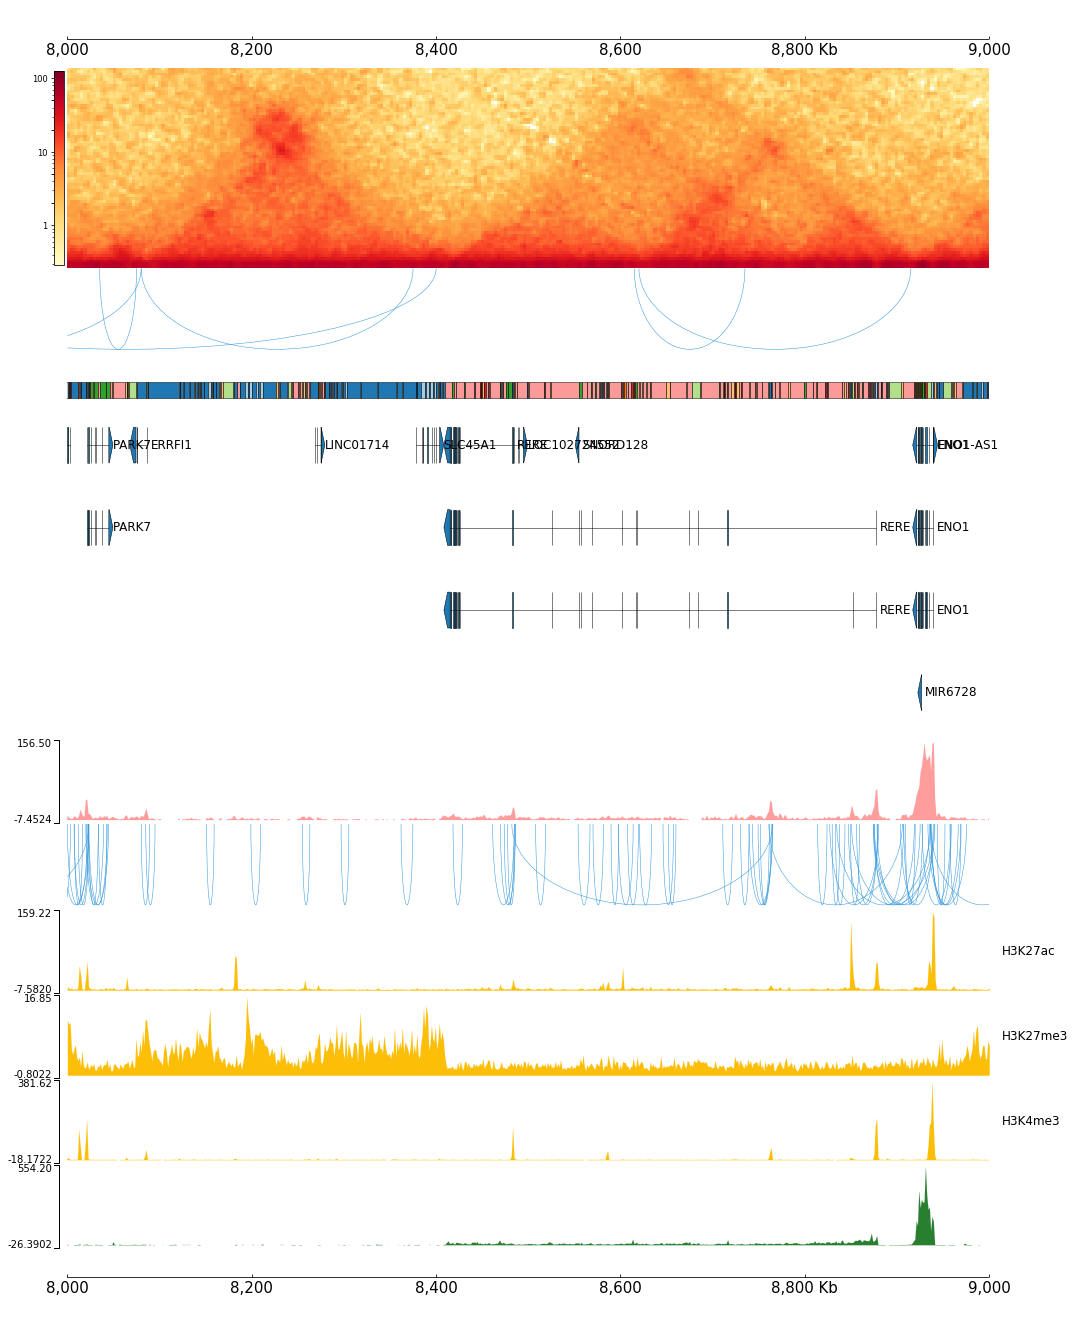

In [49]:
frame.plot("chr1", 8_000_000, 9_000_000)

## Adjust Tracks and Frame with Feature

Maybe you have noticed that, in the complex expression above, there some element witch added with 
Tracks is not a Track, for example, the `TrackHeight`, `Title` and `Title`.

These elements is `Feature`, it is represent the features of the Track.

For example, we set the color and track height feature of a bigWig track.

In [50]:
frame = XAxis() + BigWig("data/K562_H3K27me3.bigWig") + Color("#ce00ce") + TrackHeight(8)

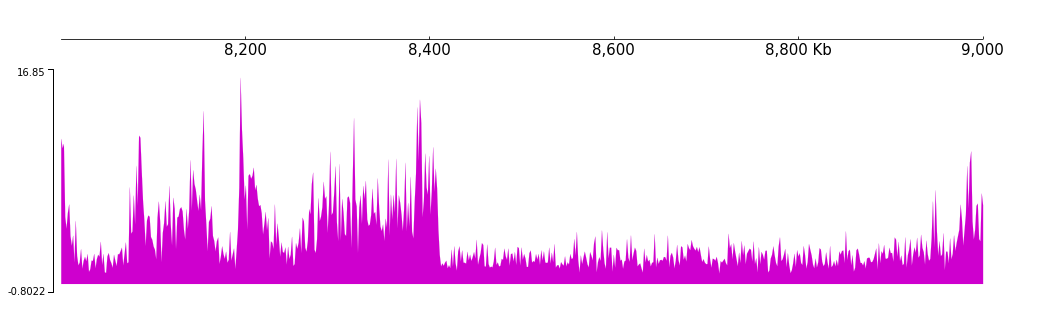

In [51]:
frame.plot("chr1", 8000000, 9000000)

By the way, there are one useful trick, you can use Feature with "`with statement`", like:

In [52]:
with Color("#fd9c6b"):
    frame1 = XAxis() +\
             BigWig("data/K562_H3K27me3.bigWig") +\
             BigWig("data/K562_H3K27ac.bigWig")  +\
             BigWig("data/K562_H3K4me3.bigWig")

with Color("#66ccff"):
    frame2 = BigWig("data/K562_chiapet.bigWig") +\
             BigWig("data/K562_RNASeq.bigWig")
        
frame = frame1 + frame2

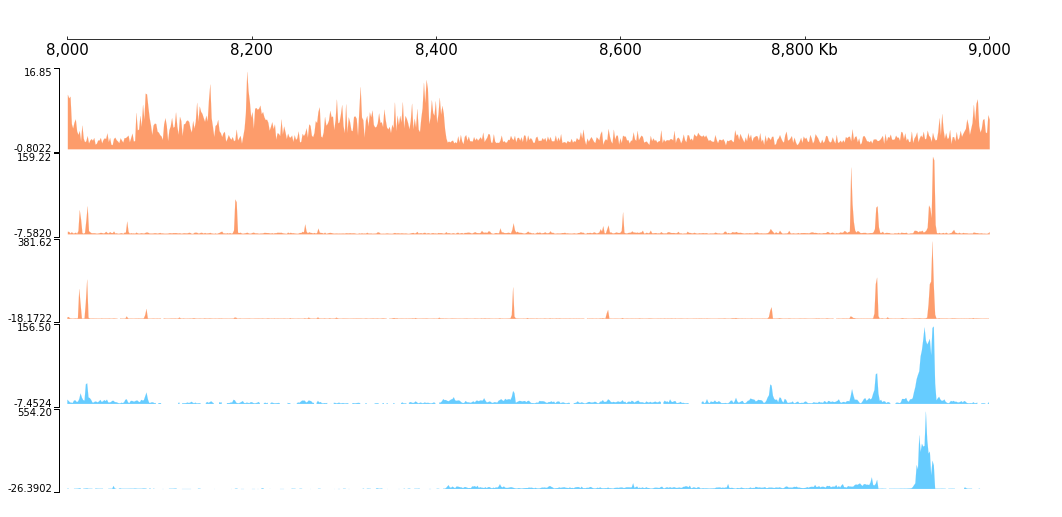

In [53]:
frame.plot("chr1", 8_000_000, 9_000_000)

As shown above, any tracks created inside the "`with statement`" will have the specified feature.

use this trick, we can simplify the complex expression:

In [56]:
frame1 = XAxis() +\
         Cool("data/K562_MbolI_5kb.mcool", style="window", depth_ratio=0.5) +\
         Arcs("data/preprocessed/K562_MbolI_looplist.arcs") + Inverted() +\
         Spacer(1) +\
         Bed("data/preprocessed/K562_chromHMM.sorted.bed", display="collapsed") + TrackHeight(0.6) +\
         Spacer(1) +\
         Bed("data/preprocessed/refGene.sorted.bed") + TrackHeight(10) +\
         Spacer(1) +\
         BigWig("data/K562_chiapet.bigWig") + Color("#ff9c9c") +\
         Arcs("data/preprocessed/K562_chiapet_interaction.arcs") + Inverted()

with Color("#fcbe07"):
    frame2 = BigWig("data/K562_H3K27ac.bigWig")  + Title("H3K27ac") +\
             BigWig("data/K562_H3K27me3.bigWig") + Title("H3K27me3") +\
             BigWig("data/K562_H3K4me3.bigWig")  + Title("H3K4me3")

frame3 = BigWig("data/K562_RNASeq.bigWig") + Color("#287f2f") + XAxis()

frame_all = frame1 + frame2 + frame3

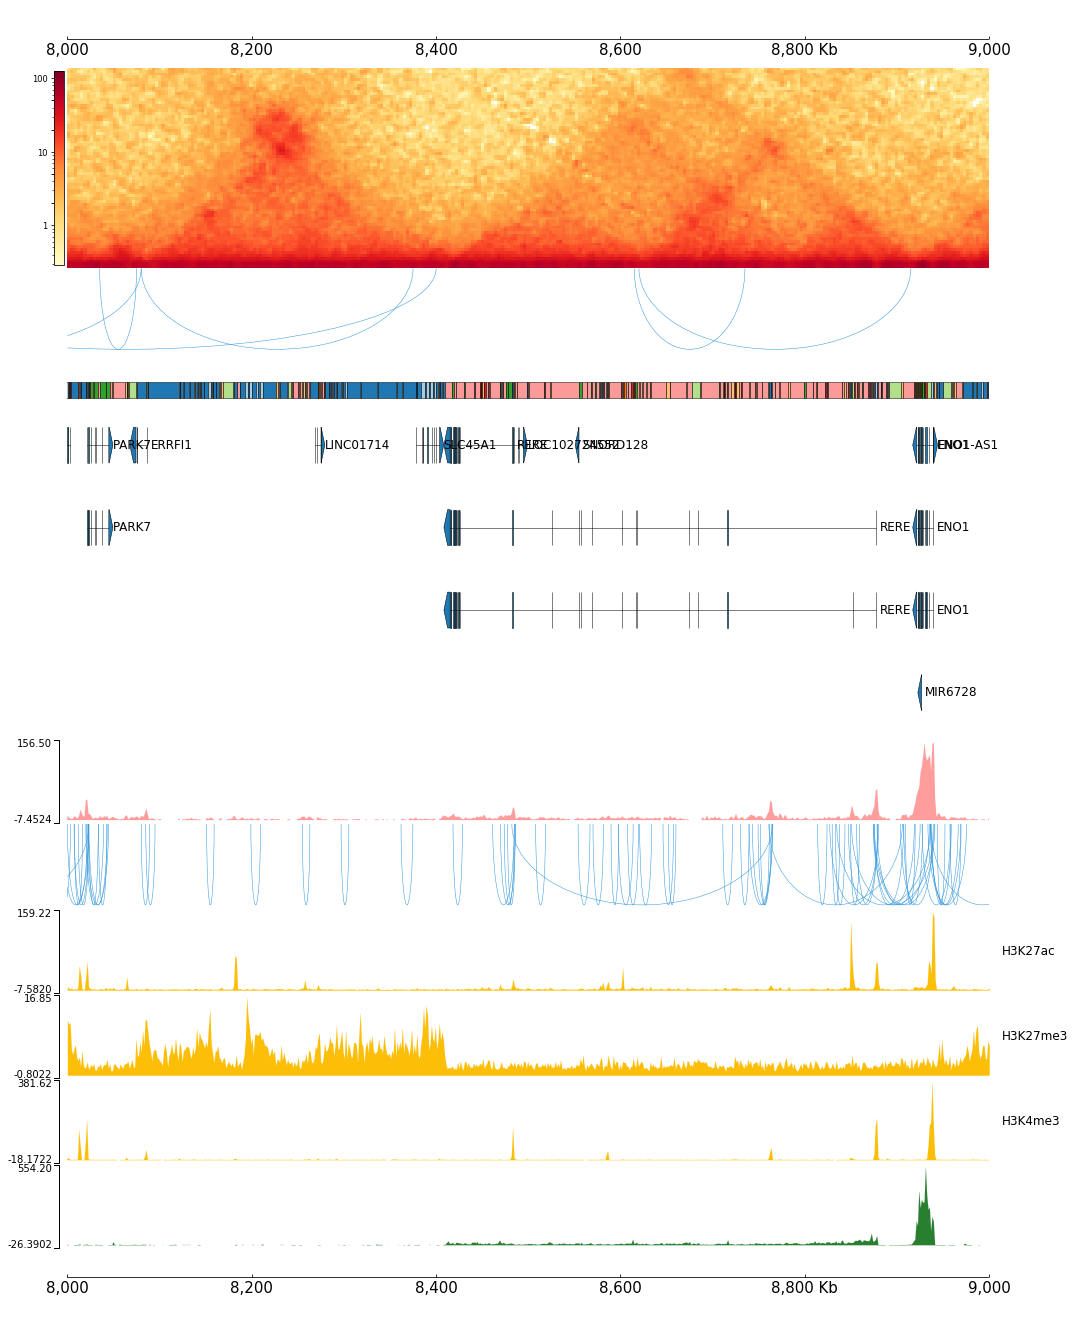

In [57]:
frame_all.plot("chr1", 8_000_000, 9_000_000)

More features see the CoolBox [Wiki](https://github.com/Nanguage/CoolBox/wiki/Feature).

## Coverage

Some times we need to draw some graphics above the original figure, for example, 
the vertical lines and highlight regions. CoolBox has another kinds of element, the `Coverage`.
We can add coverage with track, after added to track, coverage will plot upper the track when track is ploted.

### Vertical lines:

In [58]:
locus = [("chr1", 8200000), ("chr1", 8400000)]
frame = XAxis() + BigWig("data/K562_H3K27me3.bigWig") + Vlines(locus)

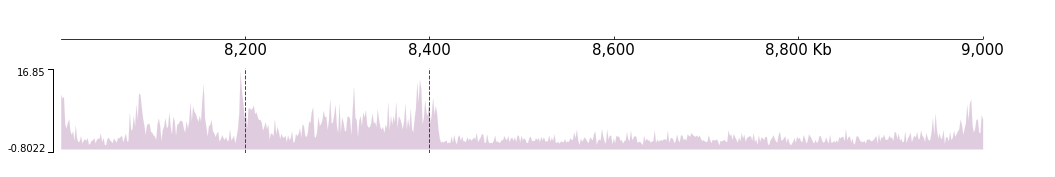

In [59]:
frame.plot("chr1", 8_000_000, 9_000_000)

Like the `Feature` if you want a set of tracks with same coverge, you can use the "`with statement`":

In [60]:
with Vlines(locus):
    frame = BigWig("data/K562_H3K27ac.bigWig")  + Title("H3K27ac") +\
            BigWig("data/K562_H3K27me3.bigWig") + Title("H3K27me3") +\
            BigWig("data/K562_H3K4me3.bigWig")  + Title("H3K4me3")
frame = XAxis() + frame + XAxis()

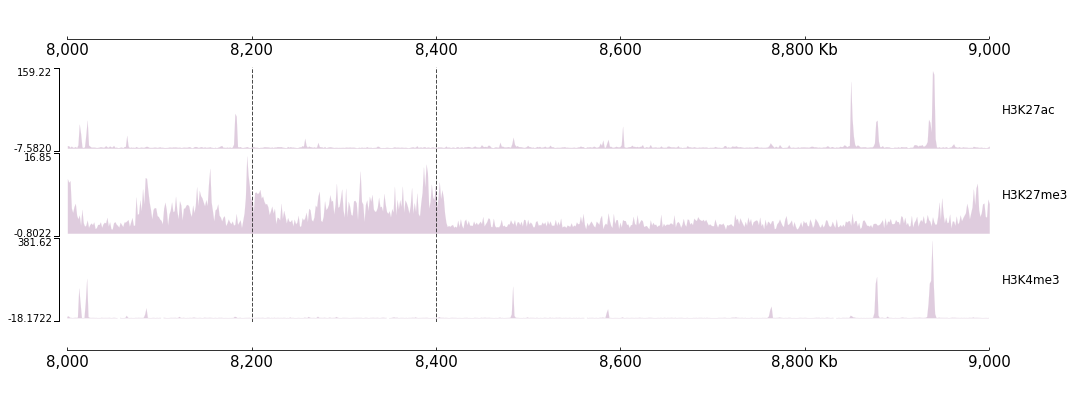

In [61]:
frame.plot("chr1", 8_000_000, 9_000_000)

Or, you can also use `*` operator do this: 

In [62]:
frame = BigWig("data/K562_H3K27ac.bigWig")  + Title("H3K27ac") +\
        BigWig("data/K562_H3K27me3.bigWig") + Title("H3K27me3") +\
        BigWig("data/K562_H3K4me3.bigWig")  + Title("H3K4me3")
frame = frame * Vlines(locus)
frame = XAxis() + frame + XAxis()

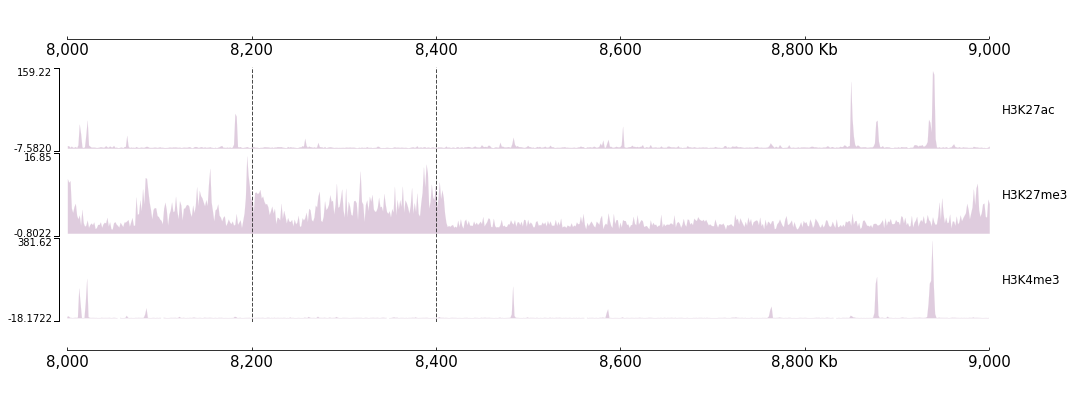

In [63]:
frame.plot("chr1", 8_000_000, 9_000_000)

### HighLights:

In [64]:
regions= ["chr1:8200000-8400000", "chr1:8600000-8800000"]

highlights = HighLights(regions)

with highlights:
    frame = BigWig("data/K562_H3K27ac.bigWig")  + Title("H3K27ac") +\
            BigWig("data/K562_H3K27me3.bigWig") + Title("H3K27me3") +\
            BigWig("data/K562_H3K4me3.bigWig")  + Title("H3K4me3")

frame = XAxis() + frame + XAxis()

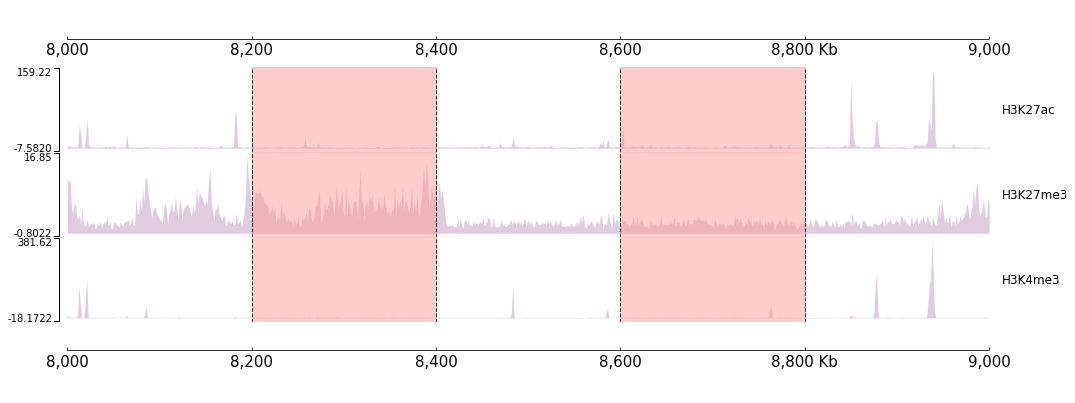

In [65]:
frame.plot("chr1", 8_000_000, 9_000_000)

### Hi-C Peack Coverage:

`coolbox.api.HiCPeaks` is a kind of `Coverage` for visualize the peaks call from the HICCUPS in the `Cool` track.

In [66]:
hicpeaks = HiCPeaks("data/K562_MbolI_looplist.txt.gz")
frame = XAxis() + Cool("data/K562_MbolI_5kb.mcool") + hicpeaks

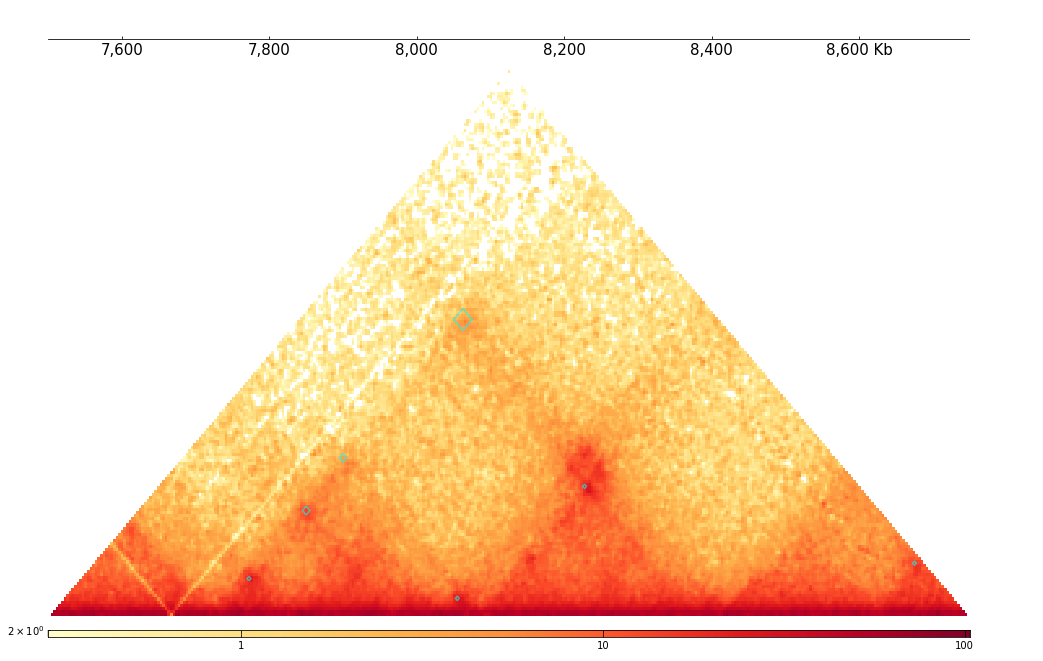

In [67]:
frame.plot("chr1", 7499999, 8749998)

## Explore Genomic Data with `coolbox.api.Browser`

When you want to explore the data, you will change the genome region window very frequently.
Under these circumstances, when you want to do the operations like "move right", "move left", "zoom in", "zoom out",
if you use above `Frame.plot` API to plot the figure, you must change parameters and run again.
It is troublesome and boring.
In order to solve this problem, CoolBox impletmented a simple GUI with [ipywidgets](https://ipywidgets.readthedocs.io/).

You can crate a `Browser` instance with a composed frame, and call `.show()` method to show the browser.


In [68]:
frame = XAxis() +\
        Cool("data/K562_MbolI_5kb.mcool") +\
        BigWig("data/K562_H3K27ac.bigWig")  + Color("#fcbe07") + Title("H3K27ac") +\
        BigWig("data/K562_H3K4me3.bigWig")  + Color("#fcbe07") + Title("H3K4me3") +\
        BigWig("data/K562_H3K27me3.bigWig") + Color("#66ccff") + Title("H3K27me3") +\
        BigWig("data/K562_RNASeq.bigWig") + Color("#ff9c9c") + Title("RNA-Seq") +\
        XAxis()

bsr = Browser(frame)

**Note: browser is valid only when the jupyter kernel is active**

In [69]:
bsr.show()

## Fetch precise data use `.fetch_data` API

In CoolBox, data and figure is bound together with a single Python object. So, you can fetch precise data of what you see in the figure.

Call the `.fetch_data` method of `Browser` or `Frame`, will return an `collection.OrderDict` which store many `pandas.Dataframe` object correspond to each tracks in the browser or frame , and the data is only about the current genome region.

In [70]:
bsr.tracks

OrderedDict([('XAxis.44', <coolbox.core.track.XAxis at 0x7f07c4c03048>),
             ('Cool.22', <coolbox.core.track.Cool at 0x7f07c4c03358>),
             ('BigWig.58', <coolbox.core.track.BigWig at 0x7f07c4c034e0>),
             ('BigWig.59', <coolbox.core.track.BigWig at 0x7f07c4c03320>),
             ('BigWig.60', <coolbox.core.track.BigWig at 0x7f07c4c1a048>),
             ('BigWig.61', <coolbox.core.track.BigWig at 0x7f07c4c1a358>),
             ('XAxis.45', <coolbox.core.track.XAxis at 0x7f07c4c1a668>)])

In [71]:
current_data = bsr.fetch_data()

In [72]:
current_data

OrderedDict([('XAxis.44', []),
             ('Cool.22',
              array([[       nan,        nan,        nan, ...,        nan,        nan,
                             nan],
                     [       nan,        nan,        nan, ...,        nan,        nan,
                             nan],
                     [       nan,        nan,        nan, ...,        nan,        nan,
                             nan],
                     ...,
                     [       nan,        nan,        nan, ..., 0.0612341 , 0.051851  ,
                      0.02967433],
                     [       nan,        nan,        nan, ..., 0.051851  , 0.0460561 ,
                      0.05903509],
                     [       nan,        nan,        nan, ..., 0.02967433, 0.05903509,
                      0.05418199]])),
             ('BigWig.58',        chromsome    start       end      score
              0           chr1     9825      9850   0.120000
              1           chr1     9850      987

The interaction pairs data of Cool Track in broeser in current genome region:

In [74]:
current_cool = current_data['Cool.22']

In [76]:
current_cool.shape

(500, 500)

We can do some statics analyze on it. For example count the distribution of interaction count:

In [82]:
sns.distplot?

(0, 0.01)

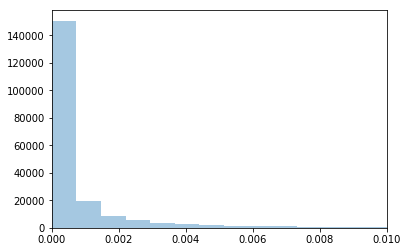

In [81]:
sns.distplot(current_cool.reshape(500*500), bins=200, kde=False)
plt.xlim(0, 0.01)

Also, you can fetch data from bigwig tracks.

In [84]:
current_data['BigWig.59'].head()

,chromsome,start,end,score
0,chr1,10104,10124,1.0
1,chr1,10124,10144,1.0
2,chr1,10144,10164,1.0
3,chr1,10164,10184,1.0
4,chr1,10184,10204,1.0


In [85]:
current_data['BigWig.60'].head()

,chromsome,start,end,score
0,chr1,9900,9925,0.64
1,chr1,9925,9950,1.32
2,chr1,9950,9975,2.00
3,chr1,9975,10000,2.00
4,chr1,10000,10025,2.00
